# Simplistic voting model

Do different algorithms of cheating create different fingerprints?

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def visualize(nominal, total, n_govt, n_opposition):
    plt.figure(figsize=(5,4))
    plt.plot(total/nominal, n_govt/total, 'b.');
    plt.plot(total/nominal, n_opposition/total, 'r.');
    plt.xlim(0,1); plt.xlabel('Turnover');
    plt.ylim(0,1); plt.ylabel('Pro-government vote');

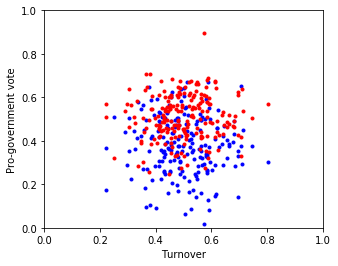

In [20]:
# Actual, true underlying situation
n_points = 200 # N polling stations
np.random.seed(1)
nominal = np.round(np.square(np.random.normal(size=n_points)*20+50))+100 # Nominal number of voters
k_turnover =   np.abs(np.minimum(1, np.random.normal(size=n_points)*0.1 + 0.5)) # About 50%
k_opposition = np.abs(np.minimum(1, np.random.normal(size=n_points)*0.1 + 0.5)) # About 60%
k_other      = np.abs(np.minimum(1, np.random.normal(size=n_points)*0.1 + 0.1)) # About 10%

# Actual true numbers
total = nominal*k_turnover
n_opposition = nominal*k_turnover*k_opposition
n_other = nominal*k_turnover*k_other
n_govt = total-n_opposition-n_other

visualize(nominal, total, n_govt, n_opposition)

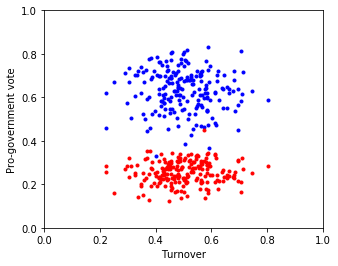

In [21]:
# Rerouting half of opposition votes to the government
total = np.round(nominal*k_turnover)
n_opposition = np.round(nominal*k_turnover*k_opposition)
n_govt = total-n_opposition-n_other

n_govt += n_opposition/2
n_opposition = n_opposition/2

visualize(nominal, total, n_govt, n_opposition)

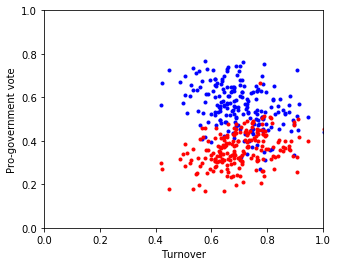

In [22]:
# "Vbros": fake votes proportional to the nominal amount
total = np.round(nominal*k_turnover)
n_opposition = np.round(nominal*k_turnover*k_opposition)
n_govt = total-n_opposition-n_other

vbros = np.round(nominal*0.2)
n_govt += vbros
total += vbros

visualize(nominal, total, n_govt, n_opposition)

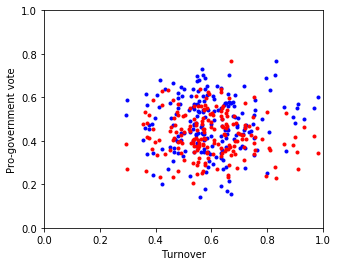

In [23]:
# "Vbros": random amount of fake votes
total = np.round(nominal*k_turnover)
n_opposition = np.round(nominal*k_turnover*k_opposition)
n_govt = total-n_opposition-n_other

vbros = np.random.randint(10,500)
n_govt += vbros
total += vbros

visualize(nominal, total, n_govt, n_opposition)

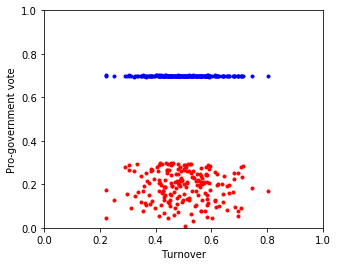

In [24]:
# Target value for government
total = nominal*k_turnover
n_other = total*k_other

n_govt = np.round(0.7*total)
n_opposition = total-n_other-n_govt

visualize(nominal, total, n_govt, n_opposition)

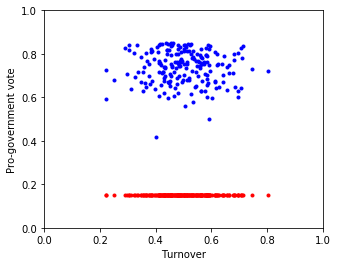

In [25]:
# Target value for opposition
total = nominal*k_turnover
n_opposition = 0.15*total
n_other = total*k_other
n_govt = total-n_other-n_opposition

visualize(nominal, total, n_govt, n_opposition)